In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering


In [2]:
#Download data
working_dataframe=pd.read_csv('final_dataframe.csv')

In [3]:
working_dataframe.head()

,Borough,Neighborhood,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides
0,Bronx,Wakefield,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0
1,Bronx,Co-op City,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0
2,Bronx,Eastchester,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0
3,Bronx,Fieldston,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0
4,Bronx,Riverdale,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22


In [4]:
#Choose feature to cluster by
model_data=working_dataframe.loc[:,['Daily_uber_rides']]

In [5]:
model_data

,Daily_uber_rides
0,0
1,0
2,0
3,0
4,22
...,...
301,20
302,1615
303,1
304,0


In [7]:
#Scale the feature
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
model_data_scaled=scaler.fit_transform(model_data)

In [8]:
selected_columns = model_data.columns

In [9]:
df_model_data_scaled = pd.DataFrame(model_data_scaled, columns = selected_columns)

In [10]:
df_model_data_scaled

,Daily_uber_rides
0,-0.272021
1,-0.272021
2,-0.272021
3,-0.272021
4,-0.216335
...,...
301,-0.221397
302,3.815863
303,-0.269490
304,-0.272021


In [12]:
model_data['Daily_uber_rides']=df_model_data_scaled['Daily_uber_rides']

In [14]:
model_data_encoded=model_data

In [15]:
#Implement Elbow Rule to define the number of clusters
def plot_distortion(model_data_encoded,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(model_data_encoded)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


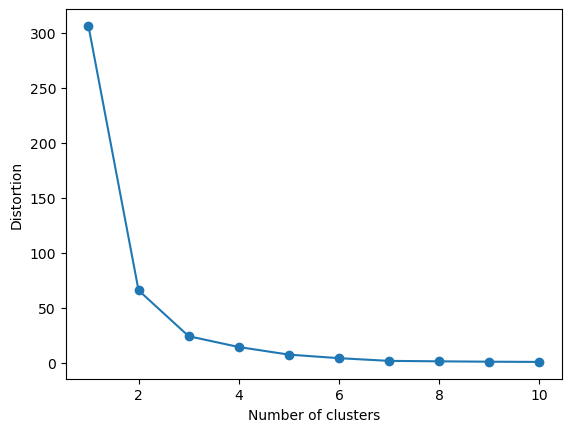

In [16]:
plot_distortion(model_data_encoded,max_clusters=10)

In [17]:
#Kmeans Clustering with defined number of Clusters
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [18]:
y_km = km.fit_predict(model_data_encoded)

In [19]:
#Silhouette Score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = km.labels_
metrics.silhouette_score(model_data_encoded, labels, metric='euclidean')

0.9378685699600784

In [20]:
#Function to plot clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [23]:
#Plot clusters with y_km 
plot_clusters(model_data_encoded.values, y_km, plt_cluster_centers= True)


IndexError: index 1 is out of bounds for axis 1 with size 1

In [25]:
#Hirachical clustering

In [26]:
#Explore the Dendrogram
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [27]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

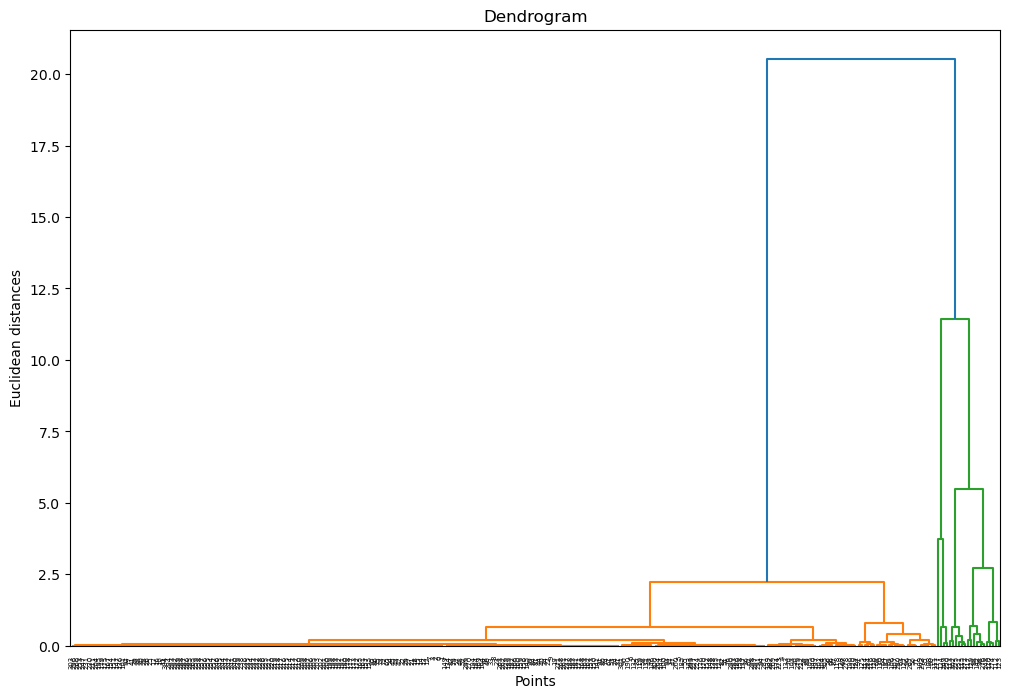

In [28]:
plot_dendrogram(model_data_encoded)

In [29]:
# create an object for Hier.Clust
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [30]:
y_hc = ac.fit_predict(model_data_encoded)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(model_data_encoded.values,y_hc)

In [31]:
metrics.silhouette_score(model_data_encoded, y_hc, metric='euclidean')

0.926164117193855

In [32]:
#DBScan

In [33]:
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

In [34]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

In [43]:
y_db = db.fit_predict(model_data_encoded)
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [38]:
model_data_encoded.shape

(306, 1)

In [40]:
#plot_clusters(model_data_encoded.values,y_db)

In [41]:
#Evaluation of DBScan - better than Kmeans. Take it to final clusters
labels = db.labels_
metrics.silhouette_score(model_data_encoded, labels, metric='euclidean')

0.9229935786572845

In [42]:
set(db.labels_) #too many clusters and some of them are noise

{-1, 0, 1}

In [45]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
metrics.silhouette_score(model_data_encoded, km.labels_, metric='euclidean')

0.9378685699600784

In [47]:
#Get Clusters for each observation
cluster_map = pd.DataFrame()
cluster_map['data_index'] = model_data_encoded.index.values
cluster_map['cluster'] = km.labels_

cluster_map

,data_index,cluster
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
301,301,0
302,302,1
303,303,0
304,304,0


In [50]:
model_data['Cluster']=cluster_map['cluster']

In [51]:
working_dataframe['Cluster']=cluster_map['cluster']

In [52]:
working_dataframe.to_csv('NYC_clusters_Uber_3.csv', index=False)

In [55]:
#This is the DataFrame for discriptive cluster analysis
working_dataframe

,Borough,Neighborhood,Latitude,Longitude,Number_of_Restaurants,Top_Restaurant_Category,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides,Cluster
0,Bronx,Wakefield,40.894705,-73.847201,5,Sandwich Restaurant,7,2,9,0,69,0,0,0
1,Bronx,Co-op City,40.874294,-73.829939,4,Restaurant,4,0,3,2,35,0,0,0
2,Bronx,Eastchester,40.887556,-73.827806,10,Seafood Restaurant,1,1,3,4,42,0,0,0
3,Bronx,Fieldston,40.895437,-73.905643,3,Mexican Restaurant,4,0,4,1,32,0,0,0
4,Bronx,Riverdale,40.890834,-73.912585,10,Seafood Restaurant,1,2,1,1,51,0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111,61,Thai Restaurant,0,0,0,1,133,100,20,0
302,Queens,Hammels,40.587338,-73.805530,33,Seafood Restaurant,0,0,1,2,80,0,1615,1
303,Queens,Bayswater,40.611322,-73.765968,0,Vietnamese Restaurant,0,0,0,0,19,0,1,0
304,Queens,Queensbridge,40.756091,-73.945631,31,Spanish Restaurant,0,0,0,0,75,80,0,0


In [56]:
df_cluster_0=working_dataframe.loc[working_dataframe.Cluster==0]

In [57]:
df_cluster_0.describe() 

,Latitude,Longitude,Number_of_Restaurants,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides,Cluster
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0
mean,40.700014,-73.944603,28.844828,3.220690,0.706897,1.248276,0.531034,74.013793,10.186207,26.175862,0.0
std,0.099017,0.123436,24.045661,4.144399,1.052409,1.554238,0.919268,45.655319,22.320250,72.102533,0.0
min,40.505334,-74.246569,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,40.615472,-74.000520,6.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.0
50%,40.693837,-73.926899,25.000000,2.000000,0.000000,1.000000,0.000000,67.500000,0.000000,3.000000,0.0
75%,40.768410,-73.856209,46.000000,4.000000,1.000000,2.000000,1.000000,102.500000,0.000000,11.000000,0.0
max,40.908543,-73.708847,91.000000,30.000000,5.000000,9.000000,5.000000,207.000000,100.000000,572.000000,0.0


In [58]:
df_cluster_1=working_dataframe.loc[working_dataframe.Cluster==1]
df_cluster_1.describe()

,Latitude,Longitude,Number_of_Restaurants,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides,Cluster
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,40.717166,-73.978518,53.833333,1.750000,0.166667,0.416667,0.250000,122.416667,47.250000,1190.416667,1.0
std,0.066575,0.072197,24.516537,4.092676,0.389249,0.900337,0.621582,44.718226,31.389416,327.288435,0.0
min,40.569606,-74.134057,2.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,645.000000,1.0
25%,40.726014,-73.997068,35.250000,0.000000,0.000000,0.000000,0.000000,91.250000,37.500000,968.250000,1.0
50%,40.738924,-73.981835,59.000000,0.000000,0.000000,0.000000,0.000000,135.000000,50.000000,1207.000000,1.0
75%,40.751003,-73.966881,74.000000,0.750000,0.000000,0.250000,0.000000,158.250000,77.750000,1456.500000,1.0
max,40.773529,-73.805530,79.000000,14.000000,1.000000,3.000000,2.000000,168.000000,80.000000,1615.000000,1.0


In [59]:
df_cluster_2=working_dataframe.loc[working_dataframe.Cluster==2]
df_cluster_2.describe()

,Latitude,Longitude,Number_of_Restaurants,Number_of_HC_Facilities,Number_of_Banks,Number_of_Schools,Number_of_Bus_Stops,Number_of_Venues,Number_of_Events,Daily_uber_rides,Cluster
count,4.000000,4.000000,4.000000,4.0,4.00,4.0,4.0,4.000000,4.000000,4.000000,4.0
mean,40.751674,-73.969152,66.500000,0.0,0.75,0.0,0.0,148.250000,59.750000,2752.250000,2.0
std,0.033946,0.037939,4.654747,0.0,1.50,0.0,0.0,23.357725,22.896506,608.427139,0.0
min,40.715229,-74.005415,62.000000,0.0,0.00,0.0,0.0,115.000000,32.000000,2362.000000,2.0
25%,40.738046,-73.992889,62.750000,0.0,0.00,0.0,0.0,141.250000,45.500000,2386.750000,2.0
50%,40.747081,-73.976500,66.500000,0.0,0.00,0.0,0.0,155.000000,63.500000,2498.000000,2.0
75%,40.760709,-73.952763,70.250000,0.0,0.75,0.0,0.0,162.000000,77.750000,2863.500000,2.0
max,40.797307,-73.918193,71.000000,0.0,3.00,0.0,0.0,168.000000,80.000000,3651.000000,2.0
